In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

PUNTO A

In [84]:
E=[0.1,0.2,0.5,1.0,2.0,5.0,10.0,20.0,50.0,100.0,155.0]#Valores de Energía en MeV
dEdx=[100,83.33,62.5,45.2,27.2,14,7.83,4.88,2.48,1.3,1.0]#Valores de la perdida de energía en KeV/mm 

Text(0.5, 1.0, 'Stopping Powers of protons on silicon')

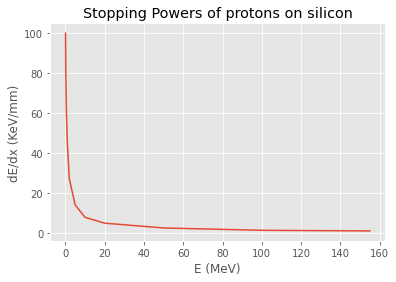

In [85]:
#Gráfica de los stopping powers 
plt.figure()
plt.plot(E,dEdx)
plt.xlabel('E (MeV)')
plt.ylabel('dE/dx (KeV/mm)')
plt.title('Stopping Powers of protons on silicon')

In [86]:
#Ajuste cuadrático
popt,pcov=curve_fit(lambda E,a,b,c: a*E**2+b*E+c,E,dEdx)
print('Ajuste cuadrático es dE/dx = ' + str(round(popt[0],4)) + 'E^2 ' + str(round(popt[1],4)) + 'E + ' + str(round(popt[2],4)))

Ajuste cuadrático es dE/dx = 0.0076E^2 -1.4484E + 51.5778


In [87]:
#Función dE/dx Cuadrática
def delta_E_cuadratico(Energia):
    return (round(popt[0],8))*(Energia**2)+(round(popt[1],8))*(Energia)+round(popt[2],8)

print(delta_E_cuadratico(4))


45.90525704


Text(0.5, 1.0, 'Stopping Powers of protons on silicon-Cuadratic fit')

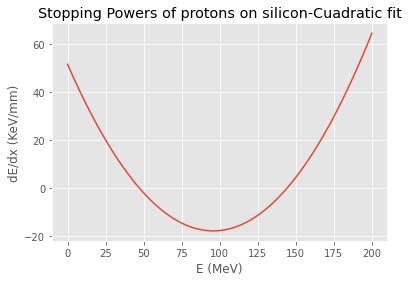

In [88]:
E_c=np.linspace(0,200,200)
dEdx_c=delta_E_cuadratico(E_c)
plt.plot(E_c,dEdx_c)
plt.xlabel('E (MeV)')
plt.ylabel('dE/dx (KeV/mm)')
plt.title('Stopping Powers of protons on silicon-Cuadratic fit')

In [89]:
#Ajuste logarítmico
popt1,pcov1=curve_fit(lambda x,a,b: a*np.log(x)+b,E,dEdx,maxfev= 10000)
print('Ajuste logaritmico es dE/dx = ' + str(round(popt1[0],4)) + ' Ln(E) + ' + str(round(popt1[1],4)))


Ajuste logaritmico es dE/dx = -13.3757 Ln(E) + 51.9248


In [90]:
#Función dE/dx logaritmico
def delta_E_logaritmico(E):
    return -13.01*np.log(E)+51.511
    #return (round(popt1[0],8))*(np.log(E))+(round(popt1[1],8))

C:\Users\simon\AppData\Local\Temp/ipykernel_17964/1275700144.py:3: RuntimeWarning: divide by zero encountered in log
  return -13.01*np.log(E)+51.511


Text(0.5, 1.0, 'Stopping Powers of protons on Silicon-Logarithmic fit')

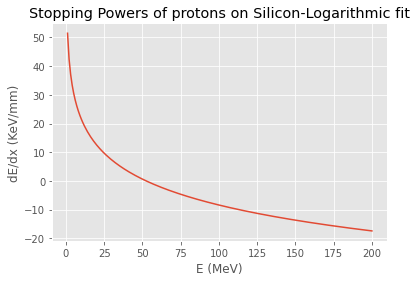

In [91]:
E_l=np.linspace(0,200,200)
dEdx2=delta_E_logaritmico(E_l)
plt.plot(E_l,dEdx2)
plt.xlabel('E (MeV)')
plt.ylabel('dE/dx (KeV/mm)')
plt.title('Stopping Powers of protons on Silicon-Logarithmic fit')

PUNTO B

In [92]:
#Condiciones iniciales 
E_inicial=100 #MeV
E_0=E_inicial#MeV
E_01=100
x_0=0
x_01=0 #mm
paso = 0.0001 #Delta x en mm

In [93]:
#Algoritmo para cuadrático
Datos={}
while E_0>0:
    x=x_0 + paso
    E=E_0 - (np.abs(delta_E_cuadratico(E_0)))*paso
    if E == E_0:
        E=E_0 - (10**(-9))
    Datos[x_0]=np.abs(delta_E_cuadratico(E_0))
    E_0=E
    x_0=x
        
print("El alcance R (range), para E inicial igial a " +str(E_inicial) + "MeV, es: " + str(round(x,4))+"mm")


El alcance R (range), para E inicial igial a 100MeV, es: 71.7953mm


In [94]:
#Algoritmo para logaritmico
Datos_l={}
while E_01>0:
    x=x_01 + paso
    E=E_01 - (np.abs(delta_E_logaritmico(E_01)))*paso
    if E == E_01:
        E=E_01 - (10**(-9))
    Datos_l[x_01]=np.abs(delta_E_logaritmico(E_01))
    E_01=E
    x_01=x
        
print("El alcance R (range), para E inicial igial a " +str(E_inicial) + "MeV, es: " + str(round(x,3))+"mm")


El alcance R (range), para E inicial igial a 100MeV, es: 205.941mm


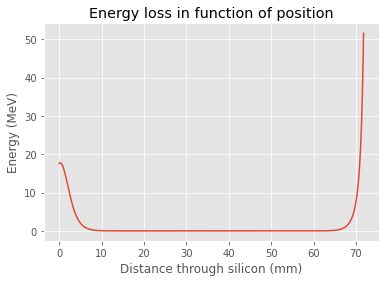

In [95]:
#Grafica posiciones contra la perdida de energía-ajuste cuadratico
X, Y =[], []
for i in Datos:
    X.append(i)
    Y.append(Datos[i])
    
plt.figure()
plt.style.use('ggplot')
plt.plot(X,Y)
plt.title('Energy loss in function of position')
plt.xlabel("Distance through silicon (mm)")
plt.ylabel ("Energy (MeV)")
#plt.ylim(0,1)
plt.show()

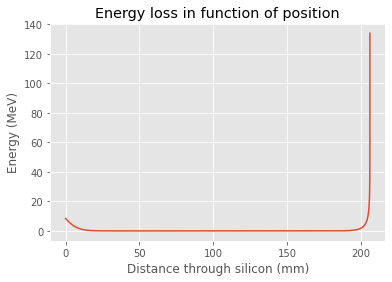

In [97]:
#Grafica posiciones contra la perdida de energía-ajuste logaritmico
A, B =[], []
for i in Datos_l:
    A.append(i)
    B.append(Datos_l[i])
    
plt.figure()
plt.style.use('ggplot')
plt.plot(A,B)
plt.title('Energy loss in function of position')
plt.xlabel("Distance through silicon (mm)")
plt.ylabel ("Energy (MeV)")
plt.show()
